# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=3,window=3)
print(model)


Word2Vec(vocab=15, vector_size=3, alpha=0.025)


In [3]:
words = list(model.wv.key_to_index)
print(words)



['example', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'text', 'of', 'first', 'a']


In [4]:
print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.15125595  0.21847363 -0.16199096]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, vector_size=3, alpha=0.025)


In [6]:
X = new_model.wv[new_model.wv.key_to_index]

In [7]:
X.shape

(15, 3)

In [8]:
X

array([[-0.0178596 ,  0.00789629,  0.17009105],
       [ 0.3003091 , -0.31009832, -0.23722696],
       [ 0.21529572,  0.2990996 , -0.16718094],
       [-0.12544577,  0.24601682, -0.05111575],
       [-0.15125595,  0.21847363, -0.16199096],
       [-0.06055515,  0.09590773,  0.03306608],
       [-0.27614433, -0.31492248,  0.24372369],
       [ 0.16905287,  0.22530986,  0.0254064 ],
       [ 0.21169631, -0.1135122 , -0.03154675],
       [ 0.19228578, -0.2507213 , -0.13120349],
       [-0.2503861 , -0.03100141,  0.31793728],
       [-0.24397223, -0.07779232, -0.06459141],
       [ 0.26924786, -0.19769652,  0.00150537],
       [-0.15845783, -0.32011834,  0.16690977],
       [-0.29198623, -0.14639418, -0.00117   ]], dtype=float32)

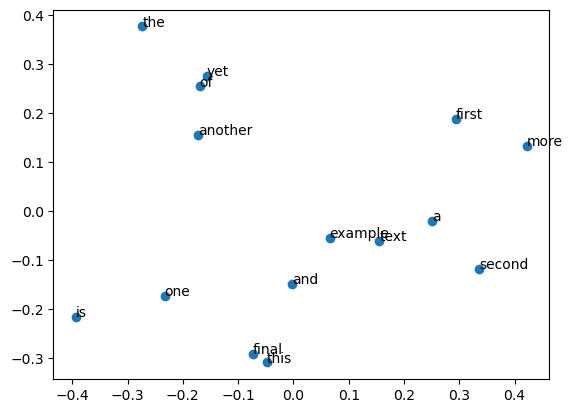

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [10]:
import gensim.downloader as api

In [11]:
corpus = api.load('text8')

In [12]:
type(corpus)


text8.Dataset

In [13]:
from gensim.models.word2vec import Word2Vec

model8= Word2Vec(corpus, vector_size=100)

In [14]:
import pandas as pd
X8 = pd.DataFrame(model8.wv[model8.wv.key_to_index])
X8['vocab']=list(model8.wv.key_to_index)

X8_sample = X8.sample(100)

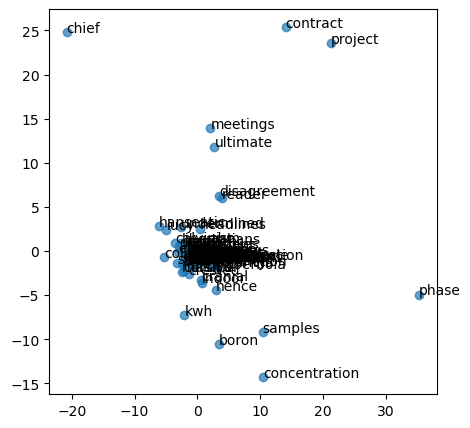

In [15]:
import random
pca = PCA(n_components=2)
result = pca.fit_transform(X8_sample.iloc[:,:-1].apply(lambda x: x*np.random.uniform(low=3, high=4) ))

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(result[:, 0], result[:, 1], alpha=0.7)
words = list(X8_sample.iloc[:,-1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [16]:
model8.wv['tree']

array([ 0.20122877, -0.30065018,  2.7111902 , -1.2758774 ,  0.53564703,
        0.61307067, -2.9061062 , -1.7803617 , -0.52723503, -1.3125265 ,
        0.9612001 , -0.79683053, -0.00952138,  1.5925118 , -0.4541095 ,
        2.9585307 ,  2.0664558 , -0.02091605, -0.2242077 , -0.07695165,
       -1.5325303 ,  1.2298125 ,  0.5279608 , -0.5314217 , -1.139818  ,
       -0.808369  ,  0.94478333, -1.37292   , -0.9186748 , -0.17684546,
        2.4558551 , -0.05125011,  1.2808391 , -0.2602277 ,  0.25820482,
        0.14332362,  1.8417205 ,  0.721045  , -1.5278451 , -1.0807952 ,
        1.1001904 , -0.68855387, -0.4441043 ,  1.0371113 ,  2.018277  ,
       -0.8681453 ,  0.4292398 , -1.9826545 , -2.1277597 , -0.25426283,
       -1.7996018 , -0.61697394,  0.00577288,  3.5667236 ,  0.05574363,
        0.52646744, -0.43841687,  1.0093689 , -2.2967901 ,  0.02772644,
       -1.7398851 , -1.4144614 , -1.3036119 ,  2.6199205 ,  0.8471535 ,
        0.28277904, -0.4769621 , -2.135614  ,  0.8217892 , -1.15

In [17]:
print(model8.wv.most_similar('tree'))

[('leaf', 0.7207858562469482), ('trees', 0.7109650373458862), ('bark', 0.6854488849639893), ('avl', 0.6058148145675659), ('flower', 0.6049225926399231), ('bird', 0.6024206876754761), ('garden', 0.597385823726654), ('fruit', 0.5925498604774475), ('leaves', 0.5838653445243835), ('sap', 0.578924834728241)]


In [18]:
print(model8.wv.most_similar('king'))

[('emperor', 0.7339203953742981), ('prince', 0.7331292629241943), ('queen', 0.7041072845458984), ('kings', 0.6916736960411072), ('throne', 0.6888033151626587), ('constantine', 0.6776020526885986), ('regent', 0.675872802734375), ('duke', 0.6477832794189453), ('vii', 0.6463311910629272), ('pope', 0.6445446014404297)]


In [19]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [20]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=5))

[('queen', 0.6730062365531921), ('empress', 0.6587918996810913), ('isabella', 0.6290969848632812), ('princess', 0.6239786744117737), ('throne', 0.6215136051177979)]


In [21]:
print(model8.wv.most_similar(positive=['renault', 'italy'], negative=['france'], topn=3))


[('scuderia', 0.6946272253990173), ('mclaren', 0.6891376376152039), ('chevrolet', 0.6818885803222656)]


In [22]:
#v(paris)-v(france)+v(germany)=v(x)

print(model8.wv.most_similar(positive=['doctor','women'], negative=['man'], topn=3))


[('midwives', 0.5970680713653564), ('lawyers', 0.5813350677490234), ('physicians', 0.558785080909729)]


In [23]:
print(model8.wv.most_similar(positive=['beatles', 'usa'], negative=['england'], topn=3))

[('dj', 0.6178522706031799), ('jam', 0.6044742465019226), ('dennis', 0.5839058756828308)]


In [24]:
model8.wv.most_similar(['banana','fruit'])

[('juice', 0.8734031319618225),
 ('lime', 0.8662872910499573),
 ('grape', 0.8613632917404175),
 ('cane', 0.8600257635116577),
 ('potatoes', 0.8596439361572266),
 ('pork', 0.8596243262290955),
 ('beans', 0.8581092953681946),
 ('coconut', 0.857731282711029),
 ('citrus', 0.8564165830612183),
 ('apples', 0.8545932769775391)]

##  Loading pre-trained models

In [25]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [26]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [27]:
print(model.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]


In [28]:
print(model.most_similar(positive=['paris','italy'], negative=['france'], topn=3))


[('lohan', 0.5069674849510193), ('madrid', 0.481842964887619), ('heidi', 0.4799900949001312)]


In [29]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723939061164856), ('royalists', 0.45945391058921814)]


In [30]:
print(model.most_similar(positive=['italy', 'beatles'], negative=['england'], topn=3))


[('radiohead', 0.5180865526199341), ('metallica', 0.511135458946228), ('quinto', 0.5088788866996765)]


## Glove

In [36]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/home/mausoto/Documents/Cursos/Generali/202301_Generali/Laboratories/Lab_08_NLP/04_word_embedding/glove.42B.300d.txt')
tmp_file = get_tmpfile('/home/mausoto/Documents/Cursos/Generali/202301_Generali/Laboratories/Lab_08_NLP/04_word_embedding/test_word2vec.txt')

_ = glove2word2vec(glove_file, tmp_file)


/tmp/ipykernel_1135950/1694745585.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [37]:
model_glove = KeyedVectors.load_word2vec_format('/home/mausoto/Documents/Cursos/Generali/202301_Generali/Laboratories/Lab_08_NLP/04_word_embedding/test_word2vec.txt')

In [38]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [39]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]